In [2]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score





In [3]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Data Science\Python\spark\Week 5\train (1).csv")

In [57]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,83327,18995,2,162,83.0,120,80,1,1,0,0,0,1
1,86196,17319,1,158,64.0,120,80,1,1,0,0,1,0
2,59158,19017,1,165,95.0,160,100,2,1,0,0,1,1
3,16399,20388,1,164,83.0,150,100,1,1,0,0,1,1
4,29470,18236,1,156,52.0,100,67,1,1,0,0,0,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56000 non-null  int64  
 1   age          56000 non-null  int64  
 2   gender       56000 non-null  int64  
 3   height       56000 non-null  int64  
 4   weight       56000 non-null  float64
 5   ap_hi        56000 non-null  int64  
 6   ap_lo        56000 non-null  int64  
 7   cholesterol  56000 non-null  int64  
 8   gluc         56000 non-null  int64  
 9   smoke        56000 non-null  int64  
 10  alco         56000 non-null  int64  
 11  active       56000 non-null  int64  
 12  cardio       56000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.6 MB


In [4]:
df["age"] = (df["age"] / 365).astype(int)

In [60]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.drop(columns=["id"], inplace=True)

In [62]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,52,2,162,83.0,120,80,1,1,0,0,0,1
1,47,1,158,64.0,120,80,1,1,0,0,1,0
2,52,1,165,95.0,160,100,2,1,0,0,1,1
3,55,1,164,83.0,150,100,1,1,0,0,1,1
4,49,1,156,52.0,100,67,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55995,57,1,165,53.0,120,75,1,1,0,0,1,1
55996,60,2,169,68.0,120,80,1,3,0,1,1,0
55997,54,2,170,74.0,120,80,1,1,0,0,0,1
55998,57,1,169,91.0,130,90,1,1,0,0,0,1


In [6]:
# Handling Outliers in Blood Pressure
df = df[(df['ap_hi'] > 80) & (df['ap_hi'] < 200)] 
df = df[(df['ap_lo'] > 40) & (df['ap_lo'] < 130)] 

In [7]:
df.shape

(54756, 12)

In [8]:
df = df.rename(columns={'alco': 'alcohol'})
df = df.rename(columns={'gluc': 'glucose'})

In [65]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio
0,52,2,162,83.0,120,80,1,1,0,0,0,1
1,47,1,158,64.0,120,80,1,1,0,0,1,0
2,52,1,165,95.0,160,100,2,1,0,0,1,1
3,55,1,164,83.0,150,100,1,1,0,0,1,1
4,49,1,156,52.0,100,67,1,1,0,0,0,0


In [66]:
correlation = df.select_dtypes("number").corr()
correlation


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio
age,1.000000,-0.024689,-0.080934,0.052786,0.211722,0.156788,0.155199,0.098055,-0.047770,-0.028099,-0.006388,0.242036
gender,-0.024689,1.000000,0.498700,0.153165,0.056802,0.064433,-0.039581,-0.025865,0.341356,0.169592,0.005887,0.003569
height,-0.080934,0.498700,1.000000,0.286370,0.017596,0.036936,-0.050001,-0.021372,0.189521,0.092704,-0.011809,-0.013416
weight,0.052786,0.153165,0.286370,1.000000,0.270214,0.254834,0.139824,0.103886,0.066805,0.065350,-0.017760,0.179464
ap_hi,0.211722,0.056802,0.017596,0.270214,1.000000,0.729141,0.193389,0.091132,0.021451,0.031670,-0.000816,0.432575
ap_lo,0.156788,0.064433,0.036936,0.254834,0.729141,1.000000,0.159412,0.072570,0.021370,0.035364,-0.000140,0.343477
cholesterol,0.155199,-0.039581,-0.050001,0.139824,0.193389,0.159412,1.000000,0.449904,0.008899,0.034968,0.009398,0.221713
glucose,0.098055,-0.025865,-0.021372,0.103886,0.091132,0.072570,0.449904,1.000000,-0.007250,0.007081,-0.007208,0.091661
smoke,-0.047770,0.341356,0.189521,0.066805,0.021451,0.021370,0.008899,-0.007250,1.000000,0.336082,0.021740,-0.019103
alcohol,-0.028099,0.169592,0.092704,0.065350,0.031670,0.035364,0.034968,0.007081,0.336082,1.000000,0.024877,-0.009811


<Axes: >

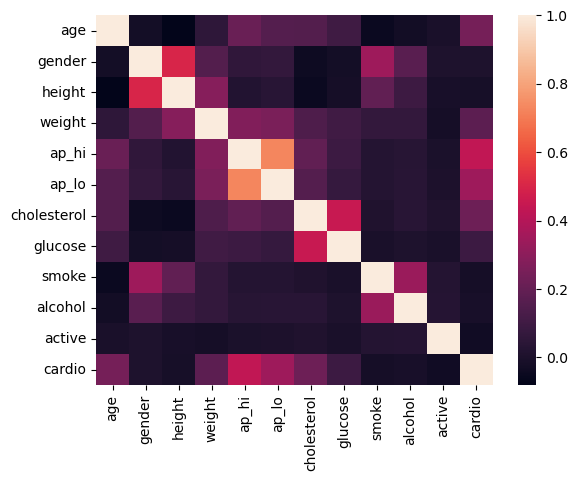

In [69]:
sns.heatmap(correlation)

In [81]:
print("Class Distribution:\n", df["cardio"].value_counts(normalize=True))


Class Distribution:
 cardio
0    0.505771
1    0.494229
Name: proportion, dtype: float64


# Splitting the Data

In [9]:
X = df.drop(columns=["cardio"])
y = df["cardio"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [14]:
accuracy = accuracy_score(y_test, y_pred)
round(accuracy, 2)

0.71